<a href="https://colab.research.google.com/github/Emiroji/Neural-network-estimation-of-vocal-function/blob/main/NN_for_estimate_Ps_Pc_aCT_aTA_aLCA_Wd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
import time
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers



In [3]:
train_stats =pd.read_csv('train_stats_new.csv')
train_stats.rename(index={0: 'ACFL', 1: 'MFDR', 2: 'OQ_mean', 3: 'sQ_mean', 4: 'f0', 5: 'H1H2', 6: 'spl'},inplace=True)
labels_train_stats =pd.read_csv('labels_train_stats_new.csv')
labels_train_stats.rename(index={0: 'Ps', 1: 'Pc', 2: 'a_TA', 3: 'a_CT', 4: 'a_LCA', 5: 'Wd'},inplace=True)

In [4]:
train_stats

,count,mean,std,min,25%,50%,75%,max
ACFL,13985.0,0.251290,0.215931,0.001040,0.083595,0.184110,0.363971,1.184156
MFDR,13985.0,351.505246,323.652215,1.129353,107.510033,244.876185,498.123962,1794.855798
OQ_mean,13985.0,75.932277,14.259338,28.235294,65.614035,76.237624,87.500000,99.885714
sQ_mean,13985.0,185.318744,72.447506,61.456177,130.701220,158.739220,229.088435,660.869565
f0,13985.0,240.210279,60.292476,60.000000,196.875000,234.574468,270.552147,397.297297
H1H2,13985.0,12.218893,4.334427,-0.000000,9.648654,11.626002,14.003443,35.093616
spl,13985.0,86.028103,12.147025,38.620609,78.392293,86.948502,95.433410,108.470496


In [5]:
labels_train_stats

,count,mean,std,min,25%,50%,75%,max
Ps,13985.0,1022.469765,459.782510,100.311392,656.391006,1029.810854,1402.116172,1872.455911
Pc,13985.0,1341.839897,890.735700,0.012413,627.623883,1151.589994,1823.309200,3999.903599
a_TA,13985.0,0.613700,0.254628,0.000000,0.400000,0.600000,0.800000,1.000000
a_CT,13985.0,0.554144,0.250609,0.000000,0.400000,0.500000,0.800000,1.000000
a_LCA,13985.0,0.561094,0.224819,0.100000,0.400000,0.600000,0.700000,0.900000
Wd,13985.0,8226.556810,15485.944973,0.203673,632.643927,2087.376953,8547.597196,226905.719358


In [6]:
#Load Infield Data
filename='InField_Data_feature_control_NPVH_W'
InField_Data_feature=pd.read_csv(filename + ".csv")

InField_Data_feature


,acflow,mfdr,oq,sq,h1h2,naq,freq,cppall,spl_15cm,isSinging,file_id,subject_id,week
0,575.245314,747.274658,81.578947,181.818182,11.327020,0.226744,292.052980,19.437655,84.975638,1,NF023_20140108_01_IBIF.mat,NF023,W1
1,520.729631,696.123730,78.378378,190.000000,9.780783,0.222733,297.972973,21.255754,83.893267,1,NF023_20140108_01_IBIF.mat,NF023,W1
2,479.823194,637.637739,83.333333,172.727273,11.609908,0.230982,306.250000,18.425145,83.048218,1,NF023_20140108_01_IBIF.mat,NF023,W1
3,435.341464,594.636128,90.000000,190.909091,12.022054,0.232790,317.266187,19.677210,82.200606,1,NF023_20140108_01_IBIF.mat,NF023,W1
4,396.851816,551.478456,88.571429,205.000000,11.208119,0.230588,319.565217,19.884673,81.513256,1,NF023_20140108_01_IBIF.mat,NF023,W1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634312,470.901321,652.339846,69.565217,220.000000,5.020789,0.172210,238.378378,29.345051,95.670629,0,NF061_20140104_03_IBIF.mat,NF061,W1
2634313,493.340404,678.323958,67.391304,190.909091,4.801698,0.173839,239.673913,31.322843,96.202205,0,NF061_20140104_03_IBIF.mat,NF061,W1
2634314,410.103161,570.558365,70.000000,190.909091,4.275353,0.175993,243.646409,25.450088,94.991037,0,NF061_20140104_03_IBIF.mat,NF061,W1
2634315,333.208593,521.943513,63.888889,155.555556,4.808357,0.198578,310.563380,26.158402,94.941616,0,NF061_20140104_03_IBIF.mat,NF061,W1


In [7]:
#Select data for Week 1 and read file name
InField_Data_feature=InField_Data_feature[InField_Data_feature['week']=='W1']
file_name=InField_Data_feature.file_id.unique()

In [8]:
#Define NN architecture
Neurons=4
def build_model():
  model = keras.Sequential([
    layers.Dense(Neurons, activation='relu', input_shape=[7]),
    layers.Dropout(0.1),
    layers.Dense(Neurons, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(6)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [9]:
# Normalization function
def norm(x):
  return (x - train_stats['min']) / (train_stats['max']- train_stats['min'] )

def norm_labels(x):
  return (x - labels_train_stats['min']) / (labels_train_stats['max']- labels_train_stats['min'] )
      

In [10]:
# Construct and load the trained NN
model = build_model()
model = keras.models.load_model('model_7I_2HL4N_6O.h5')
model.summary()                                 

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_294 (Dense)           (None, 4)                 32        
                                                                 
 dropout_196 (Dropout)       (None, 4)                 0         
                                                                 
 dense_295 (Dense)           (None, 4)                 20        
                                                                 
 dropout_197 (Dropout)       (None, 4)                 0         
                                                                 
 dense_296 (Dense)           (None, 6)                 30        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Obtain PS, Pc, A_TA, A-CT, A_LCA.
first=1
for file in file_name:
  print(file)
  InField_Data_feature_subject=InField_Data_feature[(InField_Data_feature['file_id']==file)]
  ClinicData =  pd.DataFrame(InField_Data_feature_subject, columns=['acflow','mfdr','oq','sq', 'freq','h1h2', 'spl_15cm'])
  ClinicData = ClinicData.rename(columns = {'acflow': 'ACFL', 'mfdr': 'MFDR', 'oq': 'OQ_mean', 'sq': 'sQ_mean', 'freq': 'f0', 'h1h2': 'H1H2', 'spl_15cm': 'spl'}, inplace = False)
  ClinicData['ACFL']=ClinicData['ACFL']/1000  #from mL/s --> L/s
  ClinicData['spl']=ClinicData['spl']-20*math.log(0.1/0.15,10)  # SPL from 15 cm of the mouth to 10cm of the mouth
  clinic_test_data=ClinicData
  
  normed_clinic_test_data = norm(clinic_test_data)
  clinic_test_predictions_1 = model.predict(normed_clinic_test_data)

  NN_Prediction_norm = pd.DataFrame(clinic_test_predictions_1, columns = ['Ps','Pc','a_TA','a_CT','a_LCA', 'Wd'])
  NN_Prediction_norm['Ps']=NN_Prediction_norm['Ps']*(labels_train_stats['max'][0]- labels_train_stats['min'][0] ) + labels_train_stats['min'][0]
  NN_Prediction_norm['Pc']=NN_Prediction_norm['Pc']*(labels_train_stats['max'][1]- labels_train_stats['min'][1] ) + labels_train_stats['min'][1]
  NN_Prediction_norm['a_TA']=NN_Prediction_norm['a_TA']*(labels_train_stats['max'][2]- labels_train_stats['min'][2] ) + labels_train_stats['min'][2]
  NN_Prediction_norm['a_CT']=NN_Prediction_norm['a_CT']*(labels_train_stats['max'][3]- labels_train_stats['min'][3] ) + labels_train_stats['min'][3]
  NN_Prediction_norm['a_LCA']=NN_Prediction_norm['a_LCA']*(labels_train_stats['max'][4]- labels_train_stats['min'][4] ) + labels_train_stats['min'][4]
  NN_Prediction_norm['Wd']=NN_Prediction_norm['Wd']*(labels_train_stats['max'][5]- labels_train_stats['min'][5] ) + labels_train_stats['min'][5]

  Data_InField_NN=InField_Data_feature_subject.reset_index(drop=True).join(NN_Prediction_norm)
 
  if first==1:
    Data_InField_NN_all=Data_InField_NN
    first=0
  else:
    Data_InField_NN_all=Data_InField_NN_all.append(Data_InField_NN)


NF023_20140108_01_IBIF.mat
NF023_20140107_01_IBIF.mat
NF023_20140106_01_IBIF.mat
NF023_20140105_02_IBIF.mat
NF023_20140105_01_IBIF.mat
NF023_20140104_01_IBIF.mat
NF023_20140103_01_IBIF.mat
NF023_20140102_01_IBIF.mat
NF023_20140101_03_IBIF.mat
NF023_20140101_01_IBIF.mat
NF027_20120110_02_IBIF.mat
NF027_20120110_01_IBIF.mat
NF027_20120109_02_IBIF.mat
NF027_20120109_01_IBIF.mat
NF027_20120108_02_IBIF.mat
NF027_20120108_01_IBIF.mat
NF027_20120107_01_IBIF.mat
NF027_20120106_01_IBIF.mat
NF027_20120103_02_IBIF.mat
NF027_20120103_01_IBIF.mat
NF027_20120102_05_IBIF.mat
NF027_20120102_04_IBIF.mat
NF027_20120102_01_IBIF.mat
NF027_20120101_03_IBIF.mat
NF027_20120101_02_IBIF.mat
NF037_20130122_01_IBIF.mat
NF037_20130121_01_IBIF.mat
NF037_20130120_01_IBIF.mat
NF037_20130119_01_IBIF.mat
NF037_20130109_01_IBIF.mat
NF037_20130108_02_IBIF.mat
NF037_20130108_01_IBIF.mat
NF037_20130107_01_IBIF.mat
NF037_20130101_01_IBIF.mat
NF040_20130108_01_IBIF.mat
NF040_20130107_01_IBIF.mat
NF040_20130106_01_IBIF.mat
N

In [12]:
Data_InField_NN

,acflow,mfdr,oq,sq,h1h2,naq,freq,cppall,spl_15cm,isSinging,file_id,subject_id,week,Ps,Pc,a_TA,a_CT,a_LCA,Wd
0,277.638575,356.323925,69.565217,181.818182,9.614482,0.188800,242.307692,25.329241,88.508783,0,NF061_20140104_03_IBIF.mat,NF061,W1,1183.690308,1621.564453,0.623671,0.629973,0.637200,8448.175781
1,334.228279,398.343963,66.037736,188.141026,10.603427,0.175063,208.018868,21.850535,88.991653,0,NF061_20140104_03_IBIF.mat,NF061,W1,1035.790039,1244.717651,0.619165,0.492298,0.633792,10941.453125
2,339.617649,296.304998,77.500000,170.588235,14.064247,0.210758,183.750000,23.370448,86.881618,0,NF061_20140104_03_IBIF.mat,NF061,W1,991.452332,1117.842773,0.619183,0.429910,0.632124,12835.958984
3,120.609162,71.002424,88.333333,101.994302,23.720283,0.322927,184.518828,17.327724,79.443511,0,NF061_20140104_03_IBIF.mat,NF061,W1,795.177124,885.790283,0.589498,0.487671,0.527427,5084.108398
4,162.299953,213.399181,61.111111,154.545455,5.663290,0.187805,247.752809,24.929015,83.984509,0,NF061_20140104_03_IBIF.mat,NF061,W1,1053.229858,1382.617065,0.610496,0.650475,0.638536,2936.530518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25965,456.080714,616.504032,65.217391,181.818182,6.019214,0.176349,238.378378,29.230020,95.021116,0,NF061_20140104_03_IBIF.mat,NF061,W1,1422.803711,2094.441650,0.644380,0.645437,0.636375,15668.752930
25966,470.901321,652.339846,69.565217,220.000000,5.020789,0.172210,238.378378,29.345051,95.670629,0,NF061_20140104_03_IBIF.mat,NF061,W1,1427.714600,2110.196045,0.644210,0.654931,0.636639,15318.533203
25967,493.340404,678.323958,67.391304,190.909091,4.801698,0.173839,239.673913,31.322843,96.202205,0,NF061_20140104_03_IBIF.mat,NF061,W1,1477.497192,2204.496582,0.648930,0.651847,0.636274,17164.296875
25968,410.103161,570.558365,70.000000,190.909091,4.275353,0.175993,243.646409,25.450088,94.991037,0,NF061_20140104_03_IBIF.mat,NF061,W1,1414.564941,2098.793213,0.641634,0.676257,0.637362,13716.734375


In [13]:
#Delete outlier 
Data_InField_NN= Data_InField_NN.loc[(Data_InField_NN["a_TA"] >0) & (Data_InField_NN["a_TA"] <1) & (Data_InField_NN["a_CT"] >0) & (Data_InField_NN["a_CT"] <1)  & (Data_InField_NN["a_LCA"] >0) & (Data_InField_NN["a_LCA"] <1)  & (Data_InField_NN["Wd"] >0) ]

#Save Results
Data_InField_NN_all.to_csv(filename + "_NN_results.csv")

Data_InField_NN

,acflow,mfdr,oq,sq,h1h2,naq,freq,cppall,spl_15cm,isSinging,file_id,subject_id,week,Ps,Pc,a_TA,a_CT,a_LCA,Wd
0,277.638575,356.323925,69.565217,181.818182,9.614482,0.188800,242.307692,25.329241,88.508783,0,NF061_20140104_03_IBIF.mat,NF061,W1,1183.690308,1621.564453,0.623671,0.629973,0.637200,8448.175781
1,334.228279,398.343963,66.037736,188.141026,10.603427,0.175063,208.018868,21.850535,88.991653,0,NF061_20140104_03_IBIF.mat,NF061,W1,1035.790039,1244.717651,0.619165,0.492298,0.633792,10941.453125
2,339.617649,296.304998,77.500000,170.588235,14.064247,0.210758,183.750000,23.370448,86.881618,0,NF061_20140104_03_IBIF.mat,NF061,W1,991.452332,1117.842773,0.619183,0.429910,0.632124,12835.958984
3,120.609162,71.002424,88.333333,101.994302,23.720283,0.322927,184.518828,17.327724,79.443511,0,NF061_20140104_03_IBIF.mat,NF061,W1,795.177124,885.790283,0.589498,0.487671,0.527427,5084.108398
4,162.299953,213.399181,61.111111,154.545455,5.663290,0.187805,247.752809,24.929015,83.984509,0,NF061_20140104_03_IBIF.mat,NF061,W1,1053.229858,1382.617065,0.610496,0.650475,0.638536,2936.530518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25965,456.080714,616.504032,65.217391,181.818182,6.019214,0.176349,238.378378,29.230020,95.021116,0,NF061_20140104_03_IBIF.mat,NF061,W1,1422.803711,2094.441650,0.644380,0.645437,0.636375,15668.752930
25966,470.901321,652.339846,69.565217,220.000000,5.020789,0.172210,238.378378,29.345051,95.670629,0,NF061_20140104_03_IBIF.mat,NF061,W1,1427.714600,2110.196045,0.644210,0.654931,0.636639,15318.533203
25967,493.340404,678.323958,67.391304,190.909091,4.801698,0.173839,239.673913,31.322843,96.202205,0,NF061_20140104_03_IBIF.mat,NF061,W1,1477.497192,2204.496582,0.648930,0.651847,0.636274,17164.296875
25968,410.103161,570.558365,70.000000,190.909091,4.275353,0.175993,243.646409,25.450088,94.991037,0,NF061_20140104_03_IBIF.mat,NF061,W1,1414.564941,2098.793213,0.641634,0.676257,0.637362,13716.734375


Text(0.5, 1.0, 'Wd')

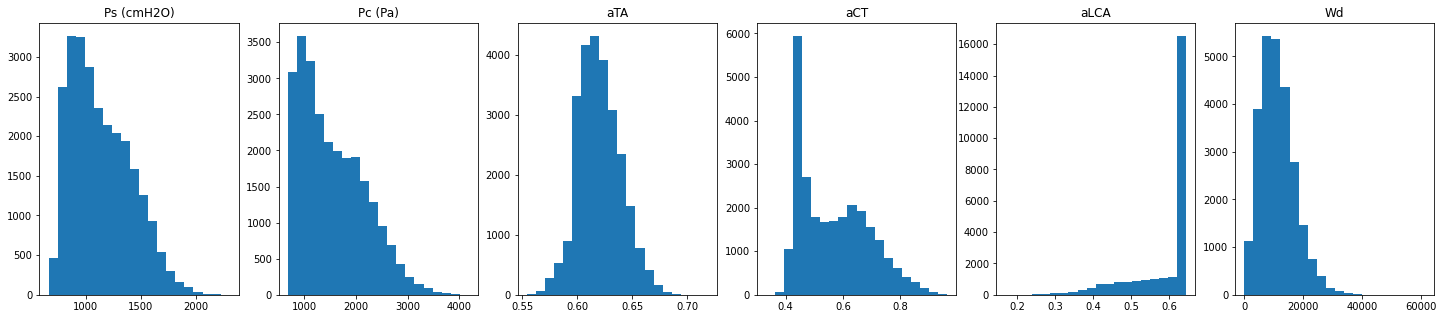

In [14]:
# Plot histogram of NN outputs
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(25, 5)
bins=20;

axs[0].hist(Data_InField_NN["Ps"],bins)
axs[0].set_title('Ps (cmH2O)') 

axs[1].hist(Data_InField_NN["Pc"],bins)
axs[1].set_title('Pc (Pa)') 

axs[2].hist(Data_InField_NN["a_TA"],bins)
axs[2].set_title('aTA') 

axs[3].hist(Data_InField_NN["a_CT"],bins)
axs[3].set_title('aCT') 

axs[4].hist(Data_InField_NN["a_LCA"],bins)
axs[4].set_title('aLCA') 

axs[5].hist(Data_InField_NN["Wd"],bins)
axs[5].set_title('Wd') 

